In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

In [2]:
data_1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/좌-우/*.csv')
data_2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/우-좌/*.csv')
data_3 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/시계방향/*.csv')
data_4 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/시계반대방향/*.csv')
len(data_1), len(data_2), len(data_3), len(data_4)

(200, 200, 200, 200)

In [3]:
data_set_1 = pd.read_csv(data_1[0], names = ['a-b','c-d'])
data_set_2 = pd.read_csv(data_1[1], names = ['a-b','c-d'])

In [4]:
data_set_1.head()

,a-b,c-d
0,-0.006162,0.065109
1,-0.006465,0.065312
2,-0.006610,0.065593
3,-0.006612,0.065929
4,-0.006487,0.066300


In [5]:
data_set_1_ab = data_set_1.iloc[:,0]
data_set_1_cd = data_set_1.iloc[:,1]

In [6]:
data_set_1_ab = df(data_set_1_ab)
data_set_1_cd = df(data_set_1_cd)
data_set_1_ab.head()

,a-b
0,-0.006162
1,-0.006465
2,-0.006610
3,-0.006612
4,-0.006487


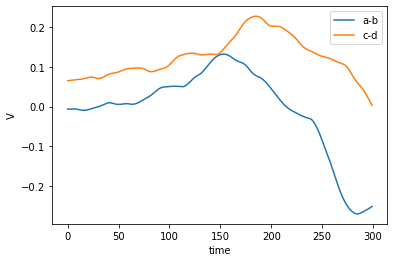

In [7]:
plt.plot(data_set_1_ab,label='a-b')  #data_set_1.plot()  works too
plt.plot(data_set_1_cd,label='c-d')
plt.xlabel('time')
plt.ylabel('V')
plt.legend()
plt.show()

In [9]:
data_ARIMA_cut_float = data_set_1_ab.astype(np.float)
data_ARIMA_cut_float.tail()

,a-b
295,-0.258603
296,-0.257025
297,-0.255444
298,-0.253843
299,-0.252177


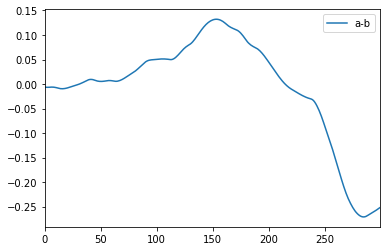

In [10]:
data_ARIMA_cut_float.plot()

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

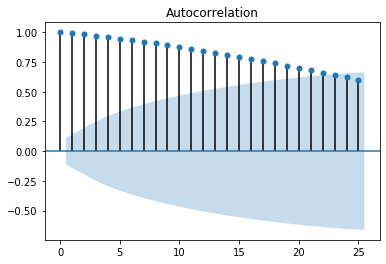

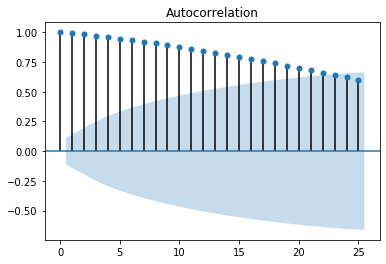

In [12]:
plot_acf(data_ARIMA_cut_float)

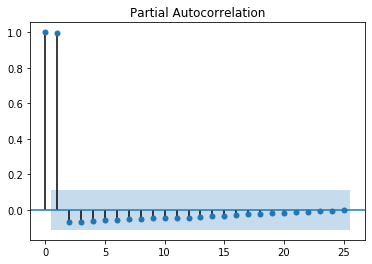

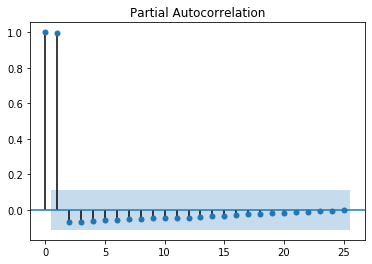

In [13]:
plot_pacf(data_ARIMA_cut_float)

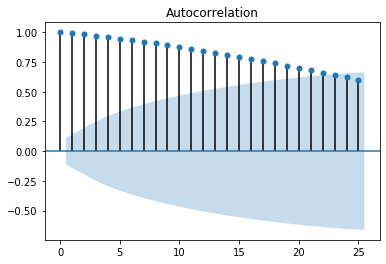

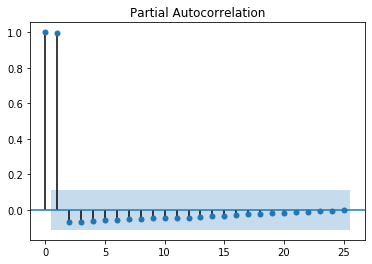

<Figure size 1440x288 with 0 Axes>

In [15]:
plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

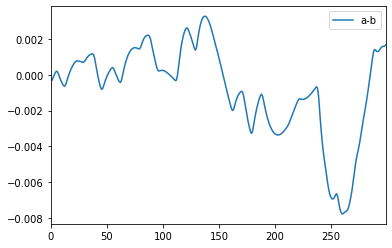

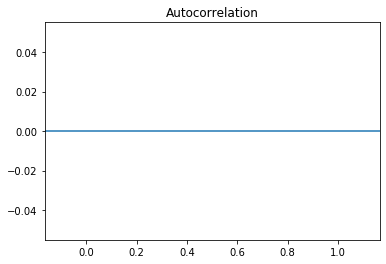

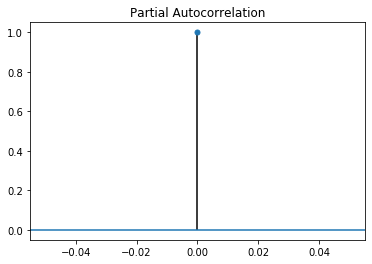

In [16]:
diff = data_ARIMA_cut_float.diff(periods=1)
diff.plot()
plot_acf(diff)
plot_pacf(diff)
plt.show()

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
model_fit = model.fit(trend='c', full_output = True, disp=1)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                  D.a-b   No. Observations:                  299
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2083.614
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Feb 2020   AIC                          -4161.227
Time:                        03:37:34   BIC                          -4150.126
Sample:                             1   HQIC                         -4156.784
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.578e-05      0.002      0.015      0.988      -0.003       0.003
ar.L1.D.a-b     0.9949      0.004    242.897      0.000       0.987       1.003
                                    Roots       

In [21]:
#위에랑 다른점 trend = nc로
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
model_fit = model.fit(trend='nc', full_output = True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.a-b   No. Observations:                  299
Model:                 ARIMA(1, 1, 0)   Log Likelihood                2083.613
Method:                       css-mle   S.D. of innovations              0.000
Date:                Sat, 29 Feb 2020   AIC                          -4163.227
Time:                        03:38:00   BIC                          -4155.826
Sample:                             1   HQIC                         -4160.265
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.a-b     0.9948      0.004    245.989      0.000       0.987       1.003
                                    Roots                                    
                  Real          Imaginary         

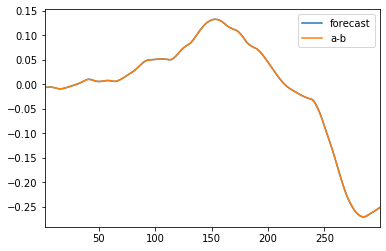

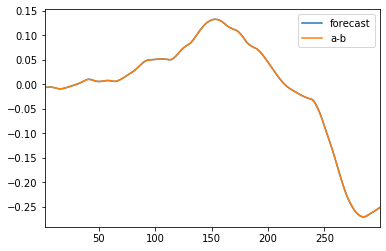

In [22]:
model_fit.plot_predict()

In [23]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([-0.25051958]), array([0.00022595]), array([[-0.25096244, -0.25007673]]))
